AMzN
Descriptive statistics of each cluster:
         Adj Close                                                              \
            count      mean       std       min       25%       50%       75%   
Cluster                                                                         
0          1668.0 -0.536149  0.370375 -0.942995 -0.821633 -0.701912 -0.246558   
1           632.0  1.487007  0.644109  0.344365  1.124143  1.301013  1.514025   
2           224.0 -0.203088  0.812872 -0.942081 -0.879203 -0.663418  0.673687   

                   Volume                                                    \
              max   count      mean       std       min       25%       50%   
Cluster                                                                       
0        0.537209  1668.0 -0.322952  0.512413 -1.388615 -0.718555 -0.395774   
1        3.597775   632.0  0.016029  0.624150 -1.431458 -0.496940 -0.068234   
2        2.088056   224.0  2.359618  1.371014  1.009712  1.400353  2.000

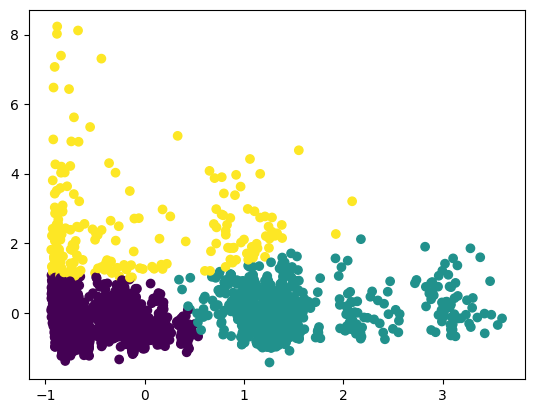

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Function to download and preprocess data
def download_and_preprocess_data(stock_symbol, features):
  data_path = f"historical_data/{stock_symbol}.csv"
  data = pd.read_csv(data_path, parse_dates=True, date_format="%d-%m-%Y")

  # Handle missing values (example: imputing with mean)
  imputer = SimpleImputer(strategy='mean')
  data[features] = imputer.fit_transform(data[features])

  # Feature selection
  # features = ['Adj Close', 'Volume']  # Choose features based on your needs

  # Feature scaling
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(data[features])
  return scaled_features

# User input for stock symbol
stock_symbol = input("Enter the stock symbol you want to analyze: ")
print(stock_symbol)

# Feature selection (assuming you want the same features as before)
features = ['Adj Close', 'Volume']

# Download and preprocess data
scaled_features = download_and_preprocess_data(stock_symbol, features)

# Create a DataFrame from the preprocessed data
data = pd.DataFrame(scaled_features, columns=features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Choose the desired number of clusters
kmeans.fit(scaled_features)

# Add cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Analyze and interpret clusters
print("Descriptive statistics of each cluster:\n", data.groupby('Cluster').describe())

# Visualize clusters 
plt.scatter(data['Adj Close'], data['Volume'], c=data['Cluster'])
plt.show()
